# Assignment No.9

#### Object Recognition using CNN (CIFAR-10 Dataset)
#### a. Train a CNN model to classify CIFAR-10 images into 10 object categorie(airplane,cat, car, dog, etc.).
#### b. Use data augmentation to improve model generalization.
#### c. Compare model performance with and without Batch Normalization and Dropout.



In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,datasets,models
import matplotlib.pyplot as plt
import numpy as np

2025-10-29 06:57:17.998340: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-29 06:57:17.999303: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-29 06:57:18.095475: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-29 06:57:19.301770: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
x_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

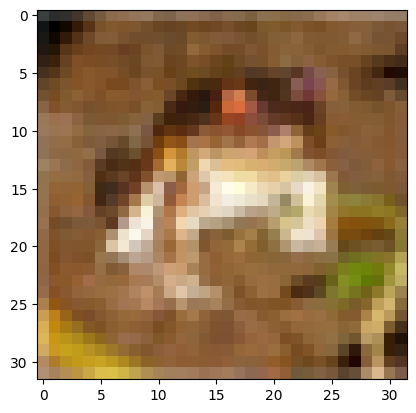

In [5]:
plt.imshow(x_train[0])

In [6]:
y_train[:5]   #2d arr

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]   ## make it 1d

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

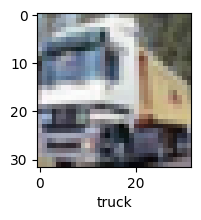

In [9]:
plot_sample(x_train,y_train,1)

In [10]:
### Normalize the Data in 0 and 1
x_train = x_train/255
x_test = x_test/255

In [11]:
## Data Augmentation

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.ZeroPadding2D(padding=4),
    layers.RandomCrop(32, 32),
])

2025-10-29 06:51:11.804435: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
  ### CNN regular model

  model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(filters=32, kernel_size= (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='softmax')
    ])

In [13]:
 ## Cnn with Batch and dropout
 model1 = models.Sequential([
        layers.Input(shape=(32, 32, 3)),
        data_augmentation,
        layers.Conv2D(filters=32, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(filters=64, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),

        layers.Dense(64),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),
        layers.Dense(32, activation='softmax')
    ])

In [14]:
 ## Regular CNN
 model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,992 (660.12 KB)

 Trainable params: 168,992 (660.12 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,632 (662.62 KB)

 Trainable params: 169,312 (661.38 KB)

 Non-trainable params: 320 (1.25 KB)

In [17]:
model1.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [18]:
history = model1.fit(x_train, y_train,validation_data=(x_test, y_test),epochs= 20,verbose=2)

Epoch 1/20


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 2304, but received input with shape (None, 4096)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
history1 = model.fit(x_train, y_train,validation_data=(x_test, y_test),epochs= 20,verbose=2)

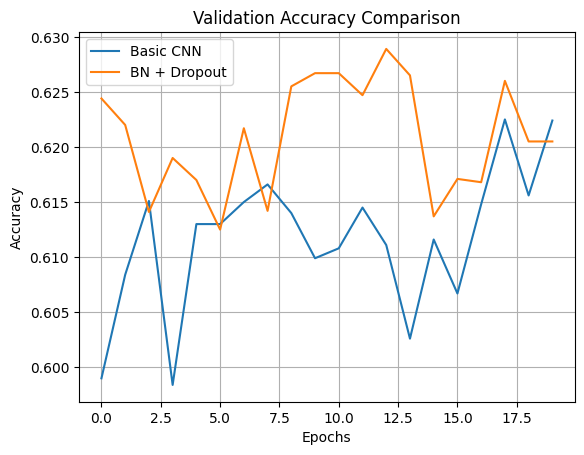

In [ ]:
plt.plot(history.history['val_accuracy'], label='Basic CNN ')
plt.plot(history1.history['val_accuracy'], label='BN + Dropout')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

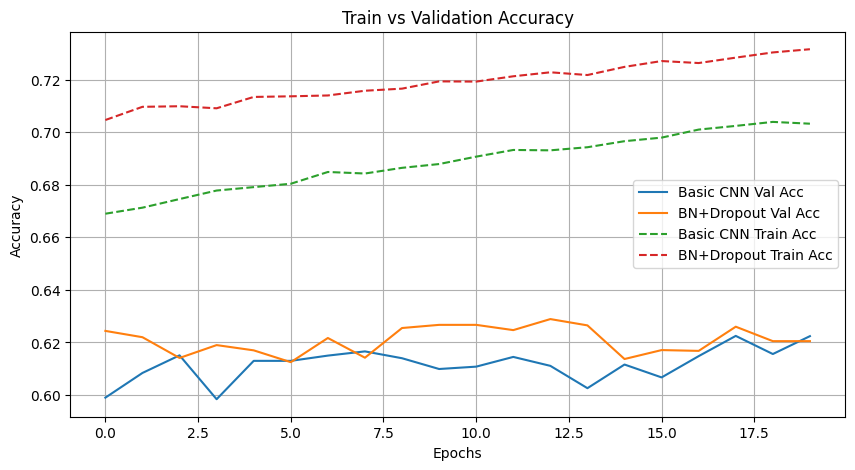

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['val_accuracy'], label='Basic CNN Val Acc')
plt.plot(history1.history['val_accuracy'], label='BN+Dropout Val Acc')
plt.plot(history.history['accuracy'], '--', label='Basic CNN Train Acc')
plt.plot(history1.history['accuracy'], '--', label='BN+Dropout Train Acc')
plt.title("Train vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(f"Basic CNN Final Validation Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")
print(f"BN+Dropout Final Validation Accuracy: {history1.history['val_accuracy'][-1]*100:.2f}%")

Basic CNN Final Validation Accuracy: 62.24%
BN+Dropout Final Validation Accuracy: 62.05%
